## Importing Libraries

In [125]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [126]:
df= pd.read_csv('stages.csv')

# Exploratory Data Analysis (EDA)

In [127]:
df.head()

,ID,AGE,WEIGHT,SG,Alb,eGFR,Na+,K+,BUN,Creat,Rbc,Wbc,Bp,Appetite,Pedal Edema,Anemia,HTN,DM,CLASS
0,1.0,57.0,89.0,1.020,4.0,80.0,135.0,3.8,40.0,1.40,3.8,7800.0,130/80,Good,Present,+,_,+,Mild-mod CKD
1,2.0,78.0,87.0,1.020,3.0,78.0,136.0,4.2,42.0,1.00,4.2,6300.0,130/82,Good,present,+,+,+,Mild-mod CKD
2,3.0,76.0,90.0,1.010,4.0,90.0,134.0,4.5,38.0,1.40,3.2,7500.0,140/88,Good,present,+,+,+,Mild-mod CKD
3,4.0,70.0,92.0,1.005,2.0,75.0,136.0,4.3,36.0,1.02,4.2,6700.0,140/86,Poor,present,+,+,+,Mild-mod CKD
4,5.0,65.0,94.0,1.010,4.0,89.0,138.0,4.3,28.0,0.80,4.5,4300.0,130/84,Good,present,_,_,+,Mild-mod CKD


In [128]:
df.shape

(612, 19)

In [129]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 612 entries, 0 to 611
Data columns (total 19 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   ID           50 non-null     float64
 1   AGE          600 non-null    float64
 2   WEIGHT       502 non-null    float64
 3   SG           506 non-null    float64
 4   Alb          510 non-null    float64
 5   eGFR         531 non-null    float64
 6   Na+          481 non-null    float64
 7   K+           470 non-null    float64
 8   BUN          569 non-null    float64
 9   Creat        585 non-null    float64
 10  Rbc          521 non-null    float64
 11  Wbc          518 non-null    float64
 12  Bp           524 non-null    object 
 13  Appetite     597 non-null    object 
 14  Pedal Edema  601 non-null    object 
 15  Anemia       545 non-null    object 
 16  HTN          555 non-null    object 
 17  DM           599 non-null    object 
 18  CLASS        608 non-null    object 
dtypes: float

In [130]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
ID,50.0,25.500000,14.577380,1.000,13.250,25.50,37.750,50.00
AGE,600.0,62.463333,15.413672,0.000,53.000,65.00,73.000,90.00
WEIGHT,502.0,76.867729,14.482366,40.000,67.000,79.00,87.750,109.00
SG,506.0,1.611413,5.056393,0.005,1.005,1.01,1.025,54.00
Alb,510.0,2.745157,1.196309,0.000,2.000,3.00,4.000,5.00
eGFR,531.0,52.075876,28.353747,4.000,28.000,46.00,77.000,115.00
Na+,481.0,134.908108,5.159033,109.000,132.000,134.00,138.000,158.00
K+,470.0,4.039319,0.682489,2.300,3.600,4.00,4.575,6.90
BUN,569.0,45.227610,27.435612,10.000,27.000,40.00,51.000,258.00
Creat,585.0,2.820803,2.716445,0.400,1.400,1.90,3.000,21.42


In [131]:
df.isnull().sum()

ID             562
AGE             12
WEIGHT         110
SG             106
Alb            102
eGFR            81
Na+            131
K+             142
BUN             43
Creat           27
Rbc             91
Wbc             94
Bp              88
Appetite        15
Pedal Edema     11
Anemia          67
HTN             57
DM              13
CLASS            4
dtype: int64

The plot to display the missing values in each features :


C:\Users\prems\anaconda3\envs\MinorProject\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


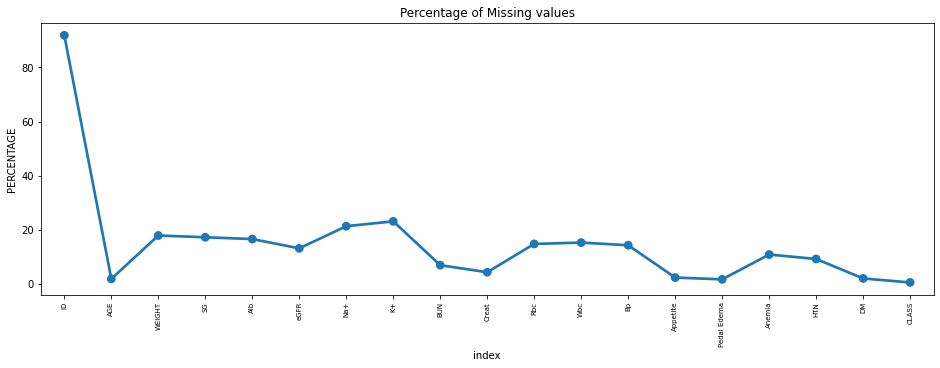

In [132]:
#plot the graph to check wether there are any missing value present
print("The plot to display the missing values in each features :")
missing = pd.DataFrame((df.isnull().sum())*100/df.shape[0]).reset_index()
plt.figure(figsize=(16,5))
ax = sns.pointplot('index',0,data=missing)
plt.xticks(rotation =90,fontsize =7)
plt.title("Percentage of Missing values")
plt.ylabel("PERCENTAGE")
plt.show()

Plot to display the distribution of each class


<AxesSubplot:xlabel='CLASS', ylabel='count'>

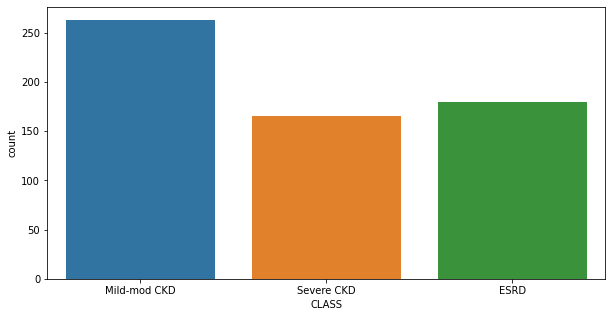

In [133]:
#plotting the count plot to vizualize the data distribution
print('Plot to display the distribution of each class')
plt.figure(figsize=(10,5))
sns.countplot(x = 'CLASS', data = df)

In [134]:
print('The unique classes inside the class feature:')
df['CLASS'].unique()

The unique classes inside the class feature:


array(['Mild-mod CKD', 'Severe CKD', 'ESRD', nan], dtype=object)

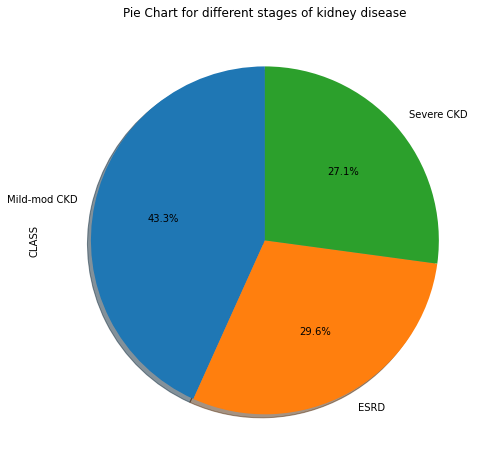

In [135]:
#To get the pie chart to analyze Kidney disease 
df['CLASS'].value_counts().plot.pie(autopct='%1.1f%%',  startangle=90,shadow=True, figsize=(8,8))
plt.title('Pie Chart for different stages of kidney disease')
plt.show()

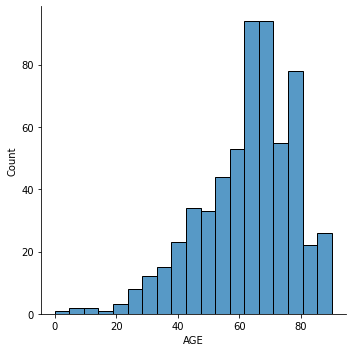

In [136]:
#Account age vs kidney disease stage
sns.displot(df['AGE'])

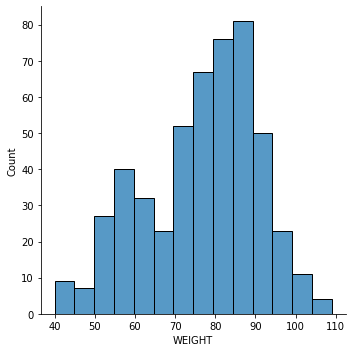

In [137]:
#Account weight vs kidney disease stage
sns.displot(df['WEIGHT'])

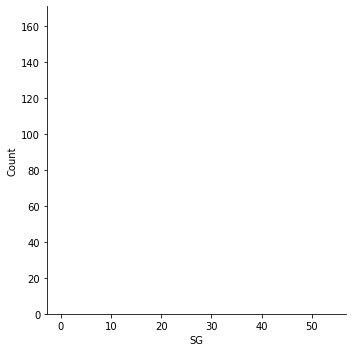

In [138]:
#Account SG vs kidney disease stage
sns.displot(df['SG'])

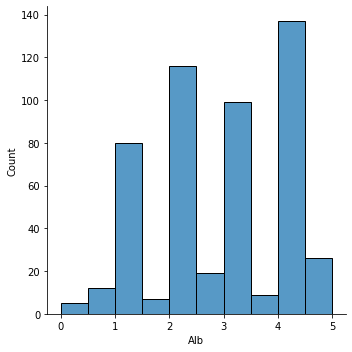

In [139]:
#Account Alb vs kidney disease stage
sns.displot(df['Alb'])

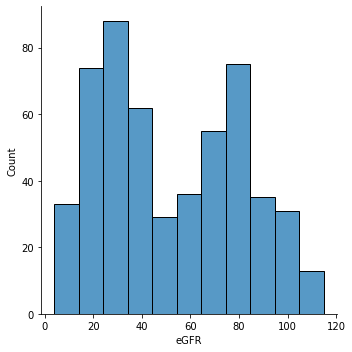

In [140]:
#Account eGFR vs kidney disease stage
sns.displot(df['eGFR'])

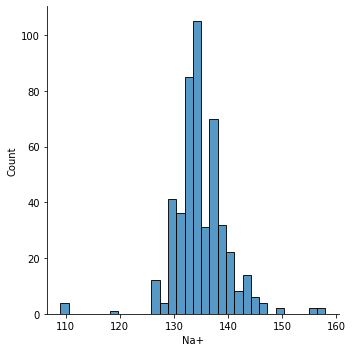

In [141]:
#Account Na+ vs kidney disease stage
sns.displot(df['Na+'])

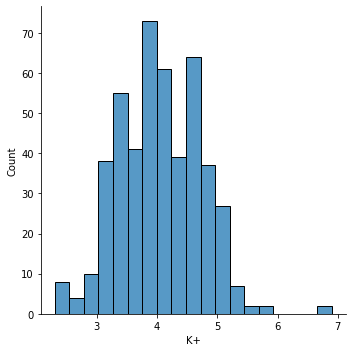

In [142]:
#Account k+ vs kidney disease stage
sns.displot(df['K+'])

<AxesSubplot:>

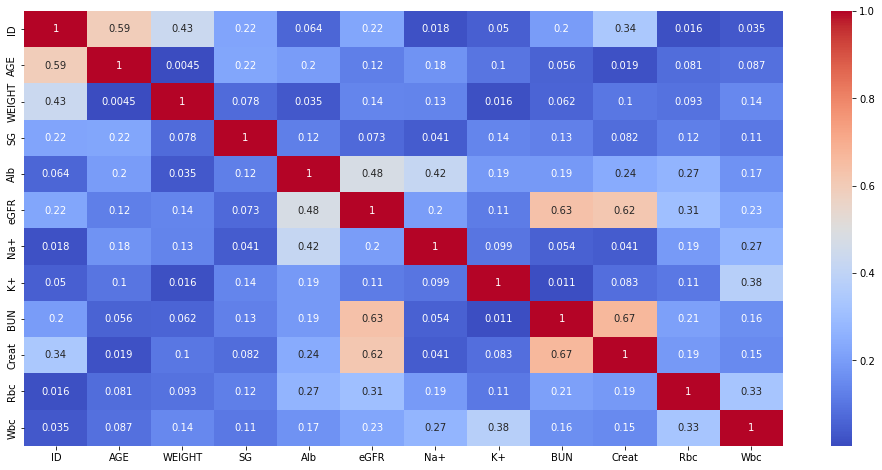

In [143]:
## plot the Correlation matrix
plt.figure(figsize=(17,8))
correlation=df.corr()
sns.heatmap(abs(correlation), annot=True, cmap='coolwarm')

## Data Preprocessing

In [144]:
df = df.drop(['ID'],axis=1)
df.columns

Index(['AGE', 'WEIGHT', 'SG', 'Alb', 'eGFR', 'Na+', 'K+', 'BUN', 'Creat',
       'Rbc', 'Wbc', 'Bp', 'Appetite', 'Pedal Edema', 'Anemia', 'HTN', 'DM',
       'CLASS'],
      dtype='object')

In [145]:
df.isna().sum()

AGE             12
WEIGHT         110
SG             106
Alb            102
eGFR            81
Na+            131
K+             142
BUN             43
Creat           27
Rbc             91
Wbc             94
Bp              88
Appetite        15
Pedal Edema     11
Anemia          67
HTN             57
DM              13
CLASS            4
dtype: int64

In [146]:
df['AGE'] = df['AGE'].fillna(df['AGE'].mean())
df['WEIGHT'] = df['WEIGHT'].fillna(df['WEIGHT'].mean())
df['SG'] = df['SG'].fillna(df['SG'].mean())
df['Alb'] = df['Alb'].fillna(df['Alb'].mean())
df['eGFR'] = df['eGFR'].fillna(df['eGFR'].mean())
df['Na+'] = df['Na+'].fillna(df['Na+'].mean())
df['K+'] = df['K+'].fillna(df['K+'].mean())
df['BUN'] = df['BUN'].fillna(df['BUN'].mean())
df['Creat'] = df['Creat'].fillna(df['Creat'].mean())
df['Rbc'] = df['Rbc'].fillna(df['Rbc'].mean())
df['Wbc'] = df['Wbc'].fillna(df['Wbc'].mean())

In [147]:
df = df.fillna(df.mode().iloc[0])

In [148]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df['Bp']=le.fit_transform(df['Bp'])
df['Appetite']=le.fit_transform(df['Appetite'])
df['Pedal Edema']=le.fit_transform(df['Pedal Edema'])
df['Anemia']=le.fit_transform(df['Anemia'])
df['HTN']=le.fit_transform(df['HTN'])
df['DM']=le.fit_transform(df['DM'])
df['CLASS']=le.fit_transform(df['CLASS'])

In [149]:
df.head()

,AGE,WEIGHT,SG,Alb,eGFR,Na+,K+,BUN,Creat,Rbc,Wbc,Bp,Appetite,Pedal Edema,Anemia,HTN,DM,CLASS
0,57.0,89.0,1.020,4.0,80.0,135.0,3.8,40.0,1.40,3.8,7800.0,35,0,0,0,1,0,1
1,78.0,87.0,1.020,3.0,78.0,136.0,4.2,42.0,1.00,4.2,6300.0,36,0,1,0,0,0,1
2,76.0,90.0,1.010,4.0,90.0,134.0,4.5,38.0,1.40,3.2,7500.0,63,0,1,0,0,0,1
3,70.0,92.0,1.005,2.0,75.0,136.0,4.3,36.0,1.02,4.2,6700.0,62,1,1,0,0,0,1
4,65.0,94.0,1.010,4.0,89.0,138.0,4.3,28.0,0.80,4.5,4300.0,37,0,1,2,1,0,1


In [150]:
x = df.iloc[:,:-1]
y = df.iloc[:,-1]

x= x.astype('float64')
y = y.astype('float64')

## Model Building

In [151]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.3,stratify=y,random_state=42)

### LOGISTIC REGRESSION

In [152]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score,classification_report
lr = LogisticRegression(random_state = 0, solver='lbfgs', multi_class='auto')
lr = lr.fit(x_train,y_train)
y_pred = lr.predict(x_test)

print("Accuracy of the model is:")
print(accuracy_score(y_pred,y_test))

Accuracy of the model is:
0.8532608695652174


C:\Users\prems\anaconda3\envs\MinorProject\lib\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


### RANDOM FOREST CLASSIFIER

In [153]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score,classification_report
rf = RandomForestClassifier()
rf = rf.fit(x_train,y_train)
y_pred = rf.predict(x_test)

print("Accuracy of the model is:")
print(accuracy_score(y_pred,y_test))

Accuracy of the model is:
0.9728260869565217


### DECISION TREE CLASSIFIER

In [154]:
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier()
dt = dt.fit(x_train,y_train)
y_pred = dt.predict(x_test)

print("Accuracy of the model is:")
print(accuracy_score(y_pred,y_test))

Accuracy of the model is:
0.9293478260869565


## Prediction

In [155]:
result = rf.predict([x_test.loc[2].values])
result = result.astype(int)
if result==0:
    print('The Particular Person has Stage-2 Kidney Disease')
elif result==1:
    print('The Particular Person has Stage-1 Kidney Disease')
else:
    print('The Particular Person has Stage-3 Kidney Disease')

The Particular Person has Stage-1 Kidney Disease


C:\Users\prems\anaconda3\envs\MinorProject\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
